In [1]:
import pandas as pd
import eq
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

## Data

|Dataset name | Catalog start | Catalog end | # events | Train NLL start | Val NLL start | Test NLL start | Mc|
|--- | --- | --- | --- | --- | --- | --- | ---|
|White et al. | 2008-01 | 2021-01 | 134975 | 2009-01 | 2014-01 | 2017-01 | 0.6|
|SCEDC | 1981-01 | 2020-01 | 125421 | 1985-01 | 2005-01 | 2014-01 | 2.0|
|QTM Salton Sea | 2008-01 | 2018-01 | 44133 | 2009-01 | 2014-01 | 2016-01 | 1.0|
|QTM San Jacinto | 2008-01 | 2018-01 | 20790 | 2009-01 | 2014-01 | 2016-01 | 1.0|

Loading existing catalog from /nfs/homedirs/shchur/research/earthquake-ntpp-release/data/White.
Loading existing catalog from /nfs/homedirs/shchur/research/earthquake-ntpp-release/data/SCEDC.
Loading existing catalog from /nfs/homedirs/shchur/research/earthquake-ntpp-release/data/QTMSaltonSea.
Loading existing catalog from /nfs/homedirs/shchur/research/earthquake-ntpp-release/data/QTMSanJacinto.


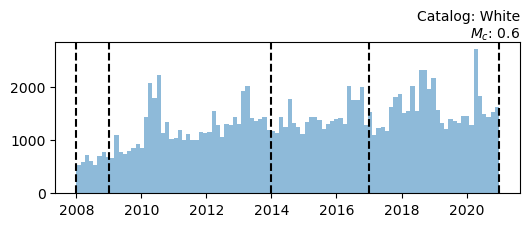

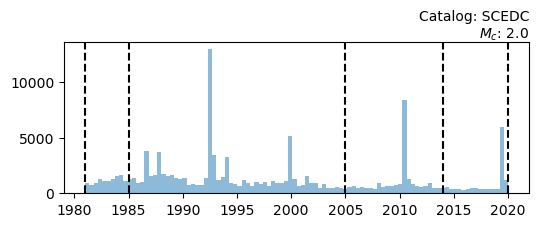

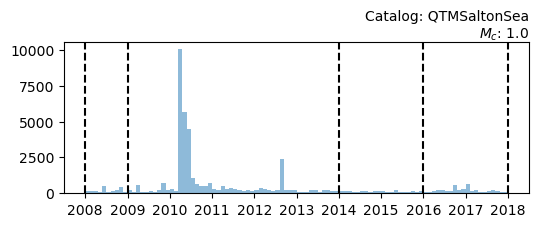

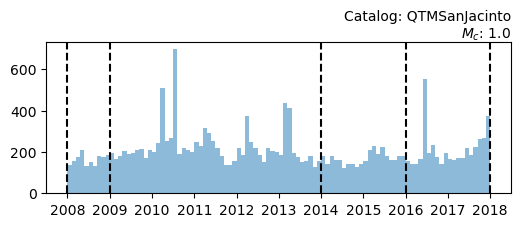

In [2]:
catalog_names = ['White', 'SCEDC', 'QTMSaltonSea', 'QTMSanJacinto']
for name in catalog_names:
    cat = getattr(eq.catalogs,name)()
    eq.visualization.visualize_catalog(cat, plot_style='hist', dpi=100, figsize=(6,2))

## Load results
For the NTPP model we train an ensemble of 5 models because the result is sensitive to random seed of the initialization.

In [3]:
results_dir = Path(eq.__file__).parents[1] / "results"
results_df = pd.read_csv(results_dir / "nll_real_world.csv", index_col=0)
results_df = results_df.query("dataset_name != 'ETAS_MultiCatalog'")
results_df[['dataset_name','model_name','nll_train','nll_val','nll_test']].style.hide_index()

dataset_name,model_name,nll_train,nll_val,nll_test
QTMSaltonSea,ETAS,-73.820083,-3.757067,-13.025055
QTMSaltonSea,ETAS,-73.820223,-3.757542,-13.025773
QTMSaltonSea,ETAS,-73.819987,-3.756778,-13.024632
QTMSaltonSea,ETAS,-73.819096,-3.758116,-13.022187
QTMSaltonSea,ETAS,-73.819480,-3.755240,-13.022396
QTMSaltonSea,RecurrentTPP,-72.690880,-3.835536,-13.109165
QTMSaltonSea,RecurrentTPP,-72.945297,-3.809870,-13.076403
QTMSaltonSea,RecurrentTPP,-72.875717,-3.816339,-13.089297
QTMSaltonSea,RecurrentTPP,-73.010223,-3.834004,-13.102699
QTMSaltonSea,RecurrentTPP,-72.633698,-3.822872,-13.085979


## Featured result
We then select the model with the best validation NLL. Note that this does not consider performance on the test set. 

In [4]:
Table_S1 = results_df.sort_values('nll_val').drop_duplicates(['dataset_name','model_name'])[['dataset_name','model_name','nll_train','nll_val','nll_test']]
Table_S1 = Table_S1.set_axis(['Dataset', 'Model ', 'Training NLL', 'Validation NLL', 'Testing NLL'], axis=1, inplace=False)

diff = Table_S1['Testing NLL'].diff().to_numpy()
Table_S1['Difference'] = diff
Table_S1['Difference'].loc[::2] = ''

pd.set_option('precision', 2)
Table_S1.style.hide_index()

Dataset,Model,Training NLL,Validation NLL,Testing NLL,Difference
White,RecurrentTPP,-63.63,-76.98,-89.64,
White,ETAS,-63.18,-76.66,-89.31,0.33
SCEDC,RecurrentTPP,-22.88,-13.64,-14.26,
SCEDC,ETAS,-22.64,-13.49,-14.26,0.01
QTMSaltonSea,RecurrentTPP,-72.69,-3.84,-13.11,
QTMSaltonSea,ETAS,-73.82,-3.76,-13.02,0.09
QTMSanJacinto,RecurrentTPP,-7.61,-2.99,-6.74,
QTMSanJacinto,ETAS,-7.44,-2.94,-6.67,0.07


**Table S1**: NLL per day scores for the catalogs examined in the study. Positive differences imply improved model fit using the NTPP.